### Linear Regression using simple linear regression

In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [99]:
df = pd.read_csv('linear_regression_dataset.csv')

In [100]:
df.head()

,study_hours,exam_score
0,4.2,68
1,1.5,42
2,7.8,83
3,3.1,58
4,9.5,91


In [101]:
df.describe()

,study_hours,exam_score
count,50.000000,50.000000
mean,5.228000,68.320000
std,2.687692,16.823744
min,0.800000,35.000000
25%,2.875000,55.000000
50%,5.300000,71.500000
75%,7.525000,81.750000
max,9.800000,94.000000


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   study_hours  50 non-null     float64
 1   exam_score   50 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 932.0 bytes


Text(0, 0.5, 'exam score')

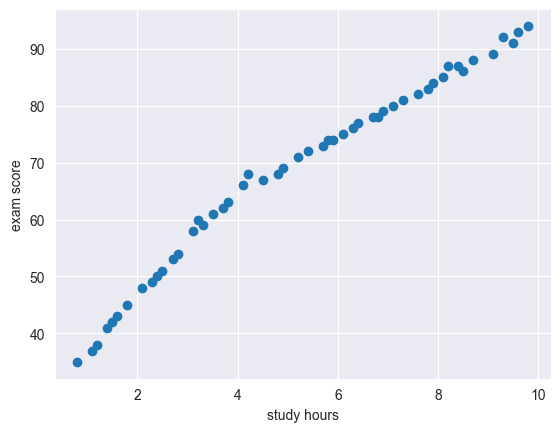

In [103]:
plt.scatter(df['study_hours'], df['exam_score'])
plt.xlabel('study hours')
plt.ylabel('exam score')

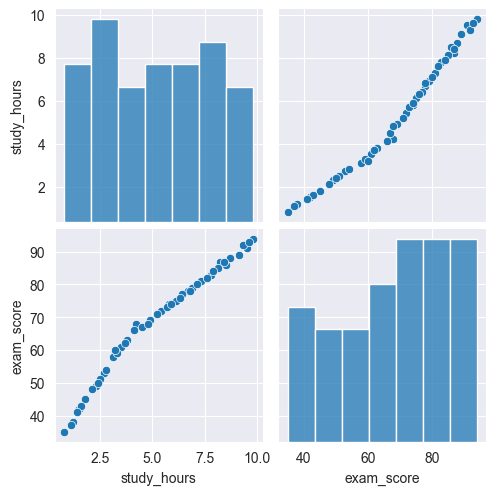

In [104]:
sns.pairplot(df)

In [105]:
# feature and label separation 

X = df[['study_hours']]
y = df['exam_score']
print(f'feature size : {X.shape}')
print(f'label size : {y.shape}')

feature size : (50, 1)
label size : (50,)


In [106]:
# train test splitting

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=42)

In [107]:
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

X_train shape: (37, 1)
X_test shape: (13, 1)
y_train shape: (37,)
y_test shape: (13,)


In [108]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print('X_train shape:', X_train_scaled.shape)
print('X_test shape:', X_test_scaled.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

X_train shape: (37, 1)
X_test shape: (13, 1)
y_train shape: (37,)
y_test shape: (13,)


In [109]:
# model usage

model = LinearRegression(n_jobs=-1)
model.fit(X_train_scaled, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,-1
,positive,False


In [110]:
mse = mean_squared_error(y_test, model.predict(X_test_scaled))
mae = mean_absolute_error(y_test, model.predict(X_test_scaled))
r2 = r2_score(y_test, model.predict(X_test_scaled))
adjusted_r2 = 1 - (1 - r2) * ((len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1))

print('mse:', mse)
print('mae:', mae)
print('r2:', r2)
print('adjusted r2:', adjusted_r2)

mse: 7.71350380897521
mae: 2.174959014257473
r2: 0.9597436185622626
adjusted r2: 0.9560839475224684


In [113]:
y_pred = model.predict(X_train_scaled)

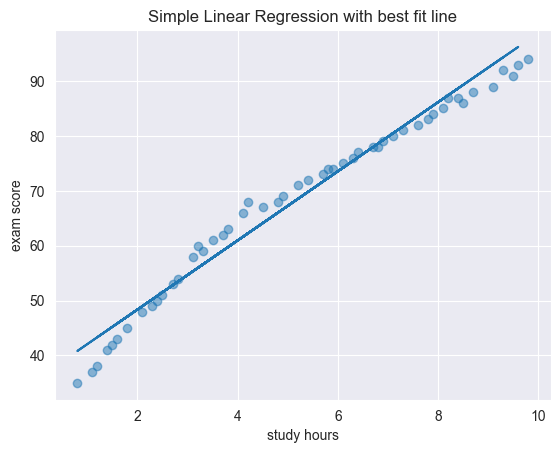

In [121]:
plt.scatter(df['study_hours'], df['exam_score'], alpha=0.5)
plt.xlabel('study hours')
plt.ylabel('exam score')
plt.plot(X_train, y_pred)
plt.title('Simple Linear Regression with best fit line')
plt.grid(True)
plt.show()

In [124]:
# Linear regression model summary

print('model coefficients:', model.coef_)
print('model intercept:', model.intercept_)

model coefficients: [15.95892352]
model intercept: 64.89189189189189


### Linear Regression using OLS (Ordinal Least Square)

In [127]:
!pip install statsmodels

In [128]:
import statsmodels.api as sm

In [129]:
X_train_scaled_ols = sm.add_constant(X_train_scaled)

In [133]:
ols_model = sm.OLS(y_train, X_train_scaled_ols).fit()

In [134]:
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:             exam_score   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                     1169.
Date:                Fri, 12 Dec 2025   Prob (F-statistic):           1.75e-28
Time:                        17:56:15   Log-Likelihood:                -90.083
No. Observations:                  37   AIC:                             184.2
Df Residuals:                      35   BIC:                             187.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         64.8919      0.467    139.025      0.0

In [135]:
y_pred_ols = ols_model.predict(X_train_scaled_ols)

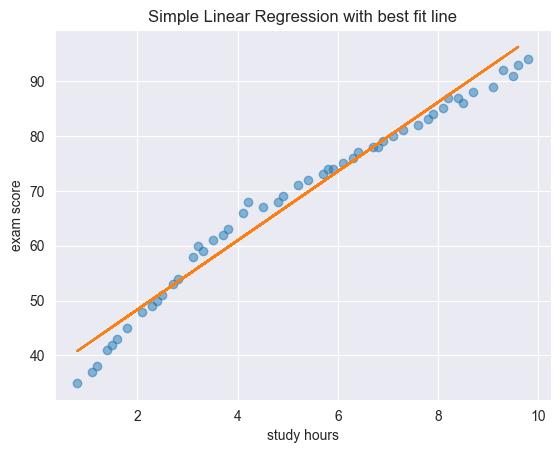

In [138]:
plt.scatter(df['study_hours'], df['exam_score'], alpha=0.5)
plt.xlabel('study hours')
plt.ylabel('exam score')
plt.plot(X_train, y_pred)
plt.plot(X_train, y_pred_ols)
plt.title('Simple Linear Regression with best fit line')
plt.grid(True)
plt.show()